In [66]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [67]:
le = preprocessing.LabelEncoder()

In [68]:
df = pd.read_csv("/home/jatin/ML & AI/general_data.csv")

In [69]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [70]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [71]:
df.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [72]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# -->>UNIVARIATE ANALYSIS

In [73]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].describe()


In [74]:
df1.T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,4401.0,11.279936,7.782222,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,4410.0,7.008163,6.125135,0.0,3.0,5.0,9.0,40.0
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.0,0.0,1.0,3.0,15.0


In [75]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].median()

In [76]:
df1.T

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [77]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].mode()
df1.T

,0
Age,35.0
DistanceFromHome,2.0
Education,3.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0


In [78]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].var()
df1.T

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [79]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].skew()
df1.T

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [80]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].kurt()
df1.T

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

# Inference from the analysis:-

# Visual Interpretation

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc49d0fefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc49d3083d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc49d308610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc49d0f3f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4a93c7ed0>],
 'means': []}

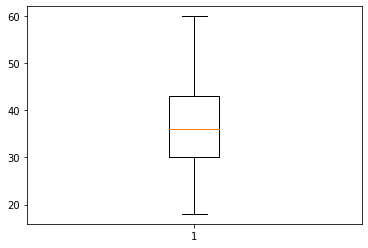

In [81]:
plt.boxplot(df.Age)

-->> Age is normally distributed without any outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4a937f850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4a9392910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4a939c1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4a939e810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4a9392bd0>],
 'means': []}

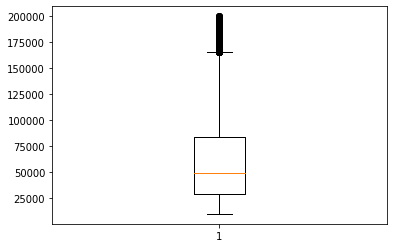

In [82]:
plt.boxplot(df.MonthlyIncome)

-->> Monthly Income is rightly skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc49c5b7410>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc49c5b7ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4a8eecfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc49d101950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc49d101e50>],
 'means': []}

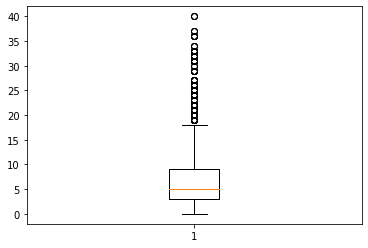

In [83]:
plt.boxplot(df.YearsAtCompany)

-->> Years at company is also Right Skewed with several outliers observed.

In [84]:
 sns.pairplot?

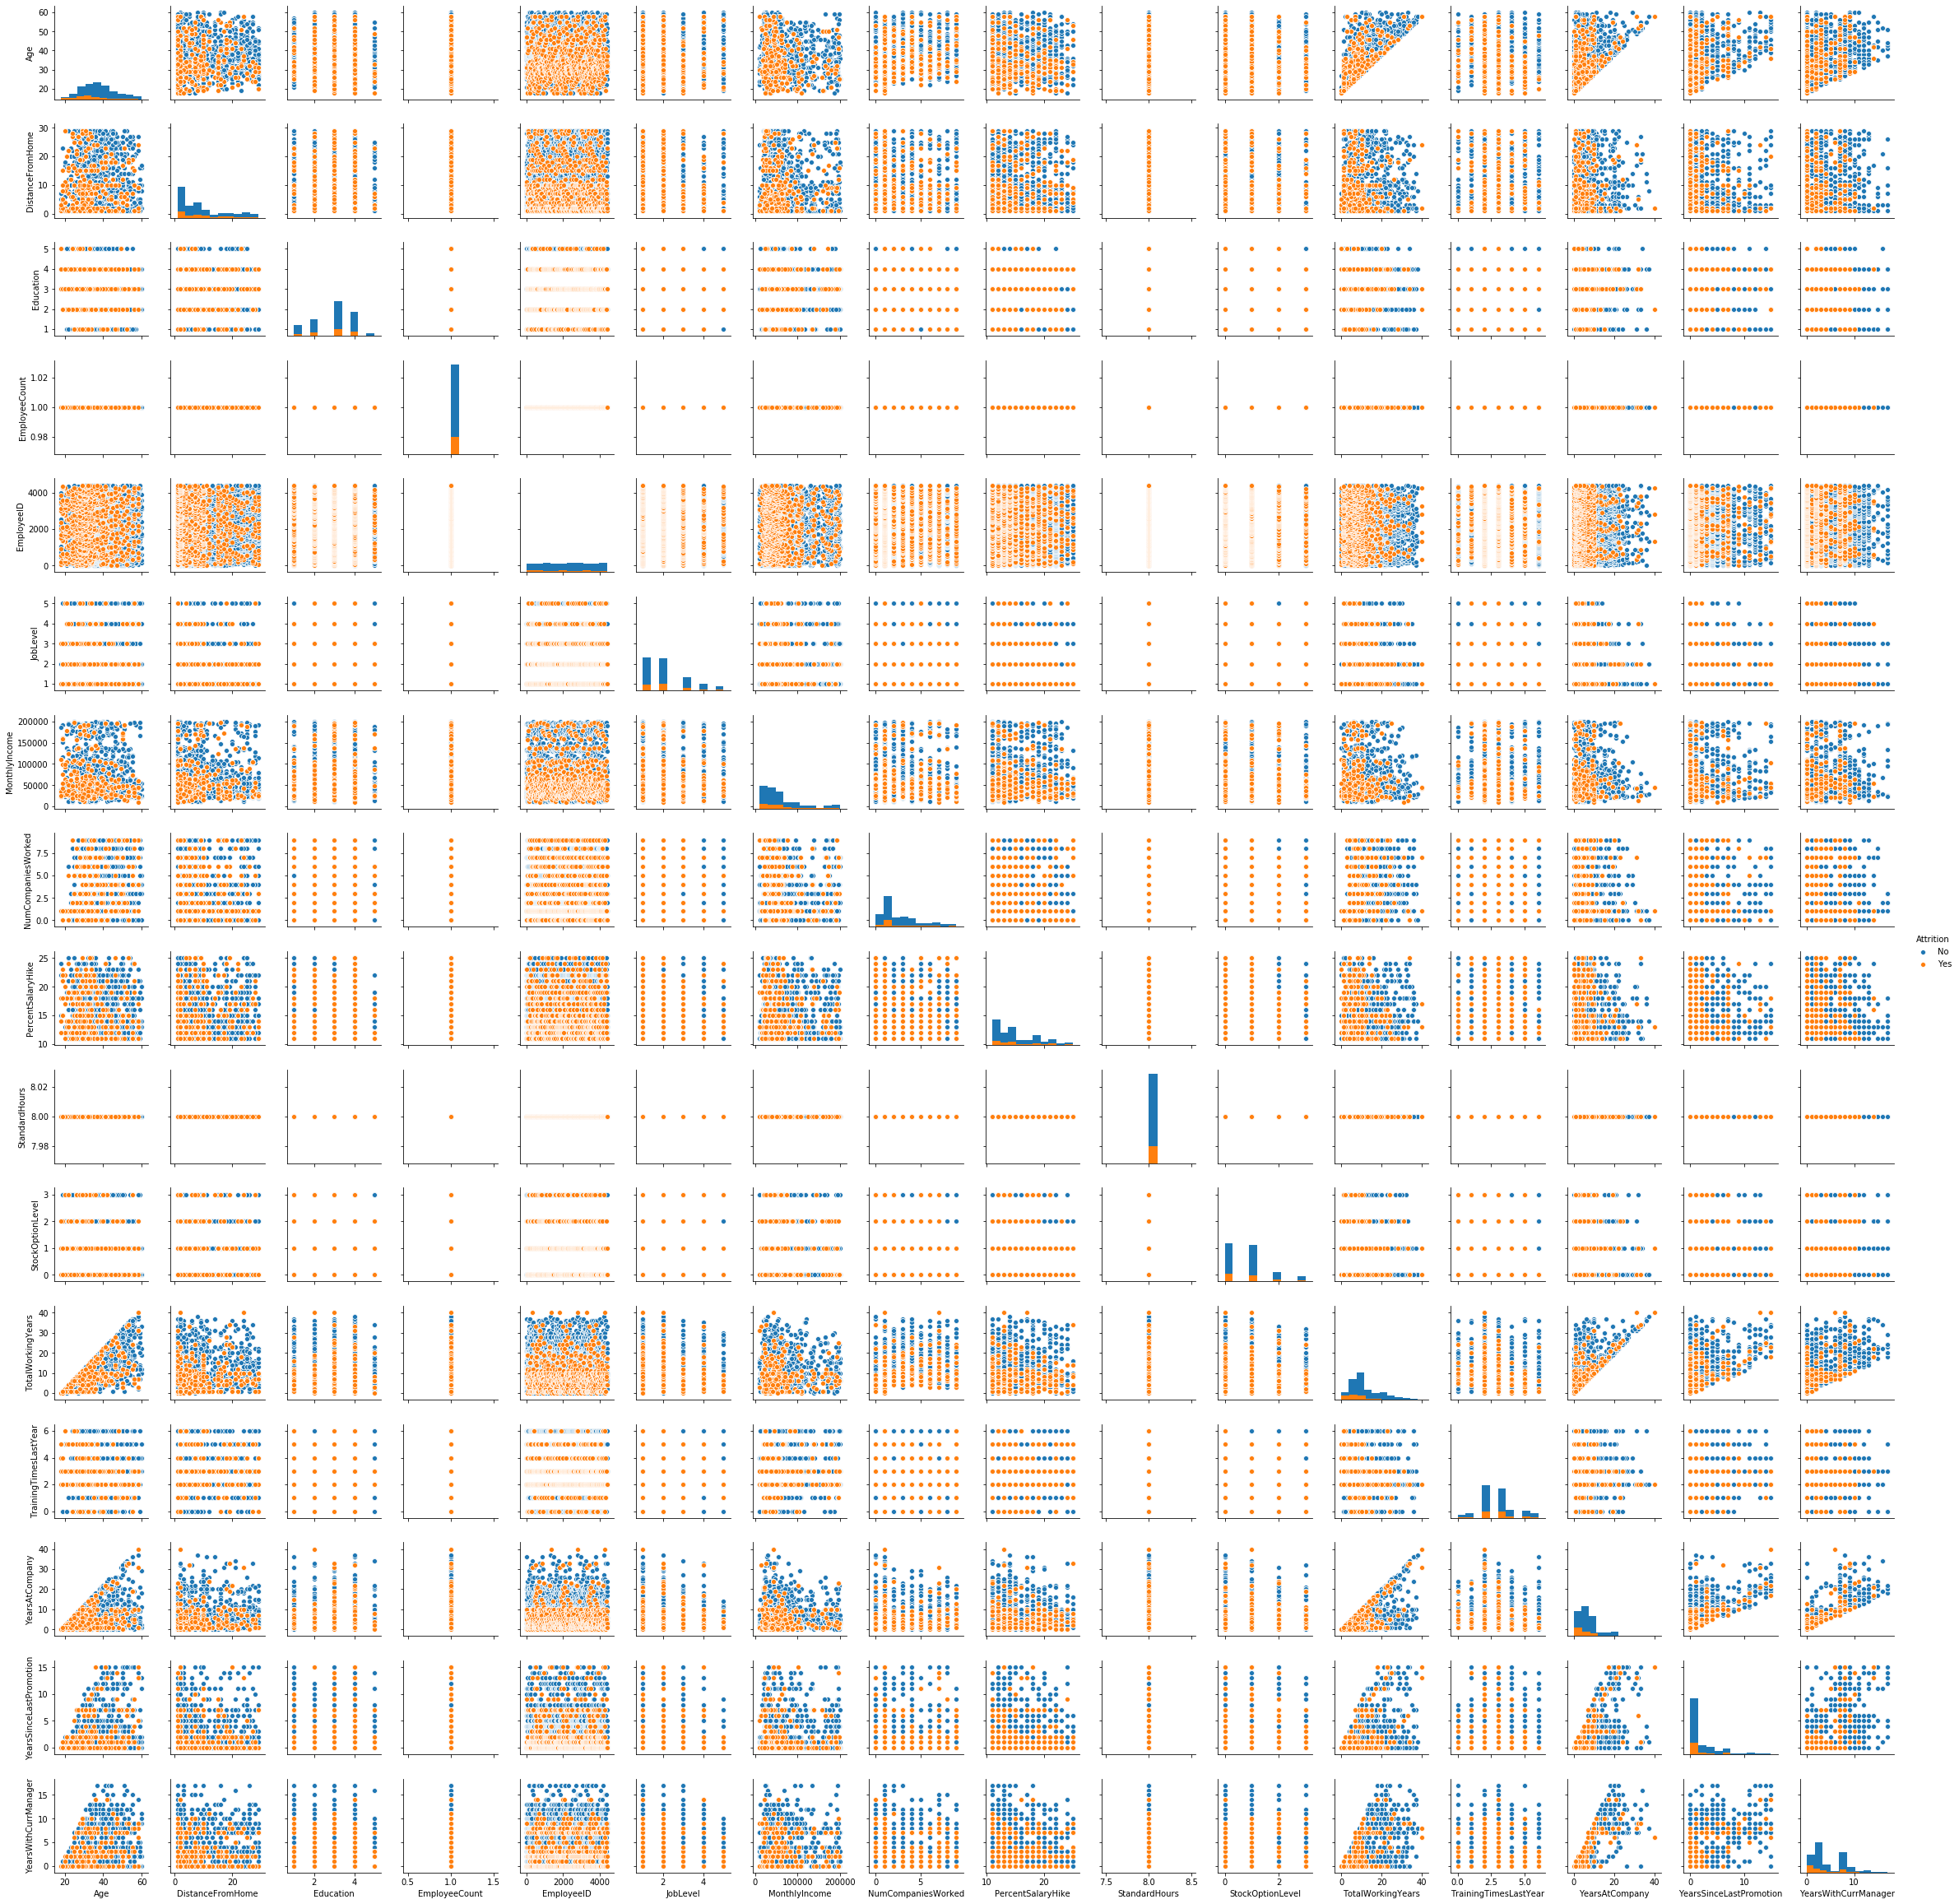

In [85]:
sns.pairplot(df,hue="Attrition",height=2.0,diag_kind='hist')

In [86]:
sns.heatmap?

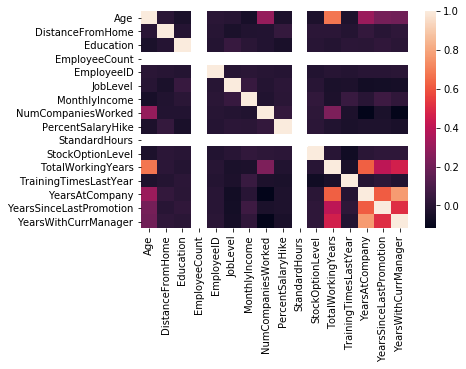

In [87]:
sns.heatmap(df.corr())

# Cleaning the data

In [88]:
data = df

In [89]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


-->> Cleaning Data Function():- 

In [90]:
def clean_data(data):
    data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
    data['Gender'] = le.fit_transform(data['Gender'])
    data['Department'] = le.fit_transform(data['Department'])
    data['EducationField'] = le.fit_transform(data['EducationField'])
    data['JobRole'] = le.fit_transform(data['JobRole'])
    data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.drop(['EmployeeCount','EmployeeID','Over18',
                   'StandardHours'],axis=1)
    print(data.head())
    return data
data = clean_data(data)

   Age Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   51        No               2           2                 6          2   
1   31       Yes               1           1                10          1   
2   32        No               1           1                17          4   
3   38        No               0           1                 2          5   
4   32        No               2           1                10          1   

   EducationField  Gender  JobLevel  JobRole  MaritalStatus  MonthlyIncome  \
0               1       0         1        0              1         131160   
1               1       0         1        6              2          41890   
2               4       1         4        7              1         193280   
3               1       1         3        1              1          83210   
4               3       1         1        7              2          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWor

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   int64  
 3   Department               4382 non-null   int64  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int64  
 7   Gender                   4382 non-null   int64  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int64  
 10  MaritalStatus            4382 non-null   int64  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel        

In [92]:
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [93]:
data.shape

(4382, 20)

In [94]:
y = data['Attrition']
y

0        No
1       Yes
2        No
3        No
4        No
       ... 
4404     No
4405     No
4406     No
4407     No
4408     No
Name: Attrition, Length: 4382, dtype: object

In [95]:
x = data.drop(["Attrition"],axis=1)
x

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,2,2,4,3,4,0,2,1,2,35390,1.0,18,0,6.0,2,6,1,5
4405,42,2,1,5,4,3,0,1,6,2,60290,3.0,17,1,10.0,5,3,0,2
4406,29,2,1,2,4,3,1,1,2,0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,2,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2


In [96]:
x.shape

(4382, 19)

In [97]:
y.shape

(4382,)

# Analysis using Random Forest-->>

In [98]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [36]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=2,oob_score=True)

In [37]:
rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
print('OOB Accuracy::')
print(rf_model.oob_score_)

OOB Accuracy::
0.8391145595618439


In [39]:
for features,imp in zip(x,rf_model.feature_importances_):
    print(features,imp)

Age 0.2063119884514017
BusinessTravel 0.026796421855906093
Department 0.013996028451918174
DistanceFromHome 0.0051927119091058375
Education 0.002385919213504275
EducationField 0.01930067371681077
Gender 0.0007406835204632503
JobLevel 0.007866978202471621
JobRole 0.004411007177596988
MaritalStatus 0.08949170274413962
MonthlyIncome 0.021132475183285596
NumCompaniesWorked 0.025200218600024273
PercentSalaryHike 0.004224916974256702
StockOptionLevel 0.001520549045088851
TotalWorkingYears 0.2331233574300625
TrainingTimesLastYear 0.010809145898634902
YearsAtCompany 0.18004284621557393
YearsSinceLastPromotion 0.006747784215478835
YearsWithCurrManager 0.14070459119427609


In [40]:
predictors = pd.DataFrame([data['Age'],data['TotalWorkingYears'],data['YearsAtCompany']]).T

In [41]:
predictors

,Age,TotalWorkingYears,YearsAtCompany
0,51.0,1.0,1.0
1,31.0,6.0,5.0
2,32.0,5.0,5.0
3,38.0,13.0,8.0
4,32.0,9.0,6.0
...,...,...,...
4404,29.0,6.0,6.0
4405,42.0,10.0,3.0
4406,29.0,10.0,3.0
4407,25.0,5.0,4.0


In [42]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=6,
                                         max_leaf_nodes=8)
tree_model.fit(predictors,y=data['Attrition'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
tree_model.score(predictors,y=data['Attrition'])

0.8491556366955728

[Text(2046.0, 2446.2, 'X[1] <= 1.5\ngini = 0.27\nsamples = 4382\nvalue = [3677, 705]'), Text(1116.0, 1902.6, 'X[0] <= 33.5\ngini = 0.5\nsamples = 273\nvalue = [140, 133]'), Text(744.0, 1359.0, 'X[0] <= 26.5\ngini = 0.495\nsamples = 237\nvalue = [107, 130]'), Text(372.0, 815.3999999999999, 'gini = 0.463\nsamples = 140\nvalue = [51, 89]'), Text(1116.0, 815.3999999999999, 'gini = 0.488\nsamples = 97\nvalue = [56, 41]'), Text(1488.0, 1359.0, 'gini = 0.153\nsamples = 36\nvalue = [33, 3]'), Text(2976.0, 1902.6, 'X[0] <= 33.5\ngini = 0.24\nsamples = 4109\nvalue = [3537, 572]'), Text(2232.0, 1359.0, 'X[2] <= 3.5\ngini = 0.315\nsamples = 1473\nvalue = [1184, 289]'), Text(1860.0, 815.3999999999999, 'X[2] <= 1.5\ngini = 0.425\nsamples = 450\nvalue = [312, 138]'), Text(1488.0, 271.7999999999997, 'gini = 0.5\nsamples = 66\nvalue = [33, 33]'), Text(2232.0, 271.7999999999997, 'gini = 0.397\nsamples = 384\nvalue = [279, 105]'), Text(2604.0, 815.3999999999999, 'gini = 0.252\nsamples = 1023\nvalue = [87

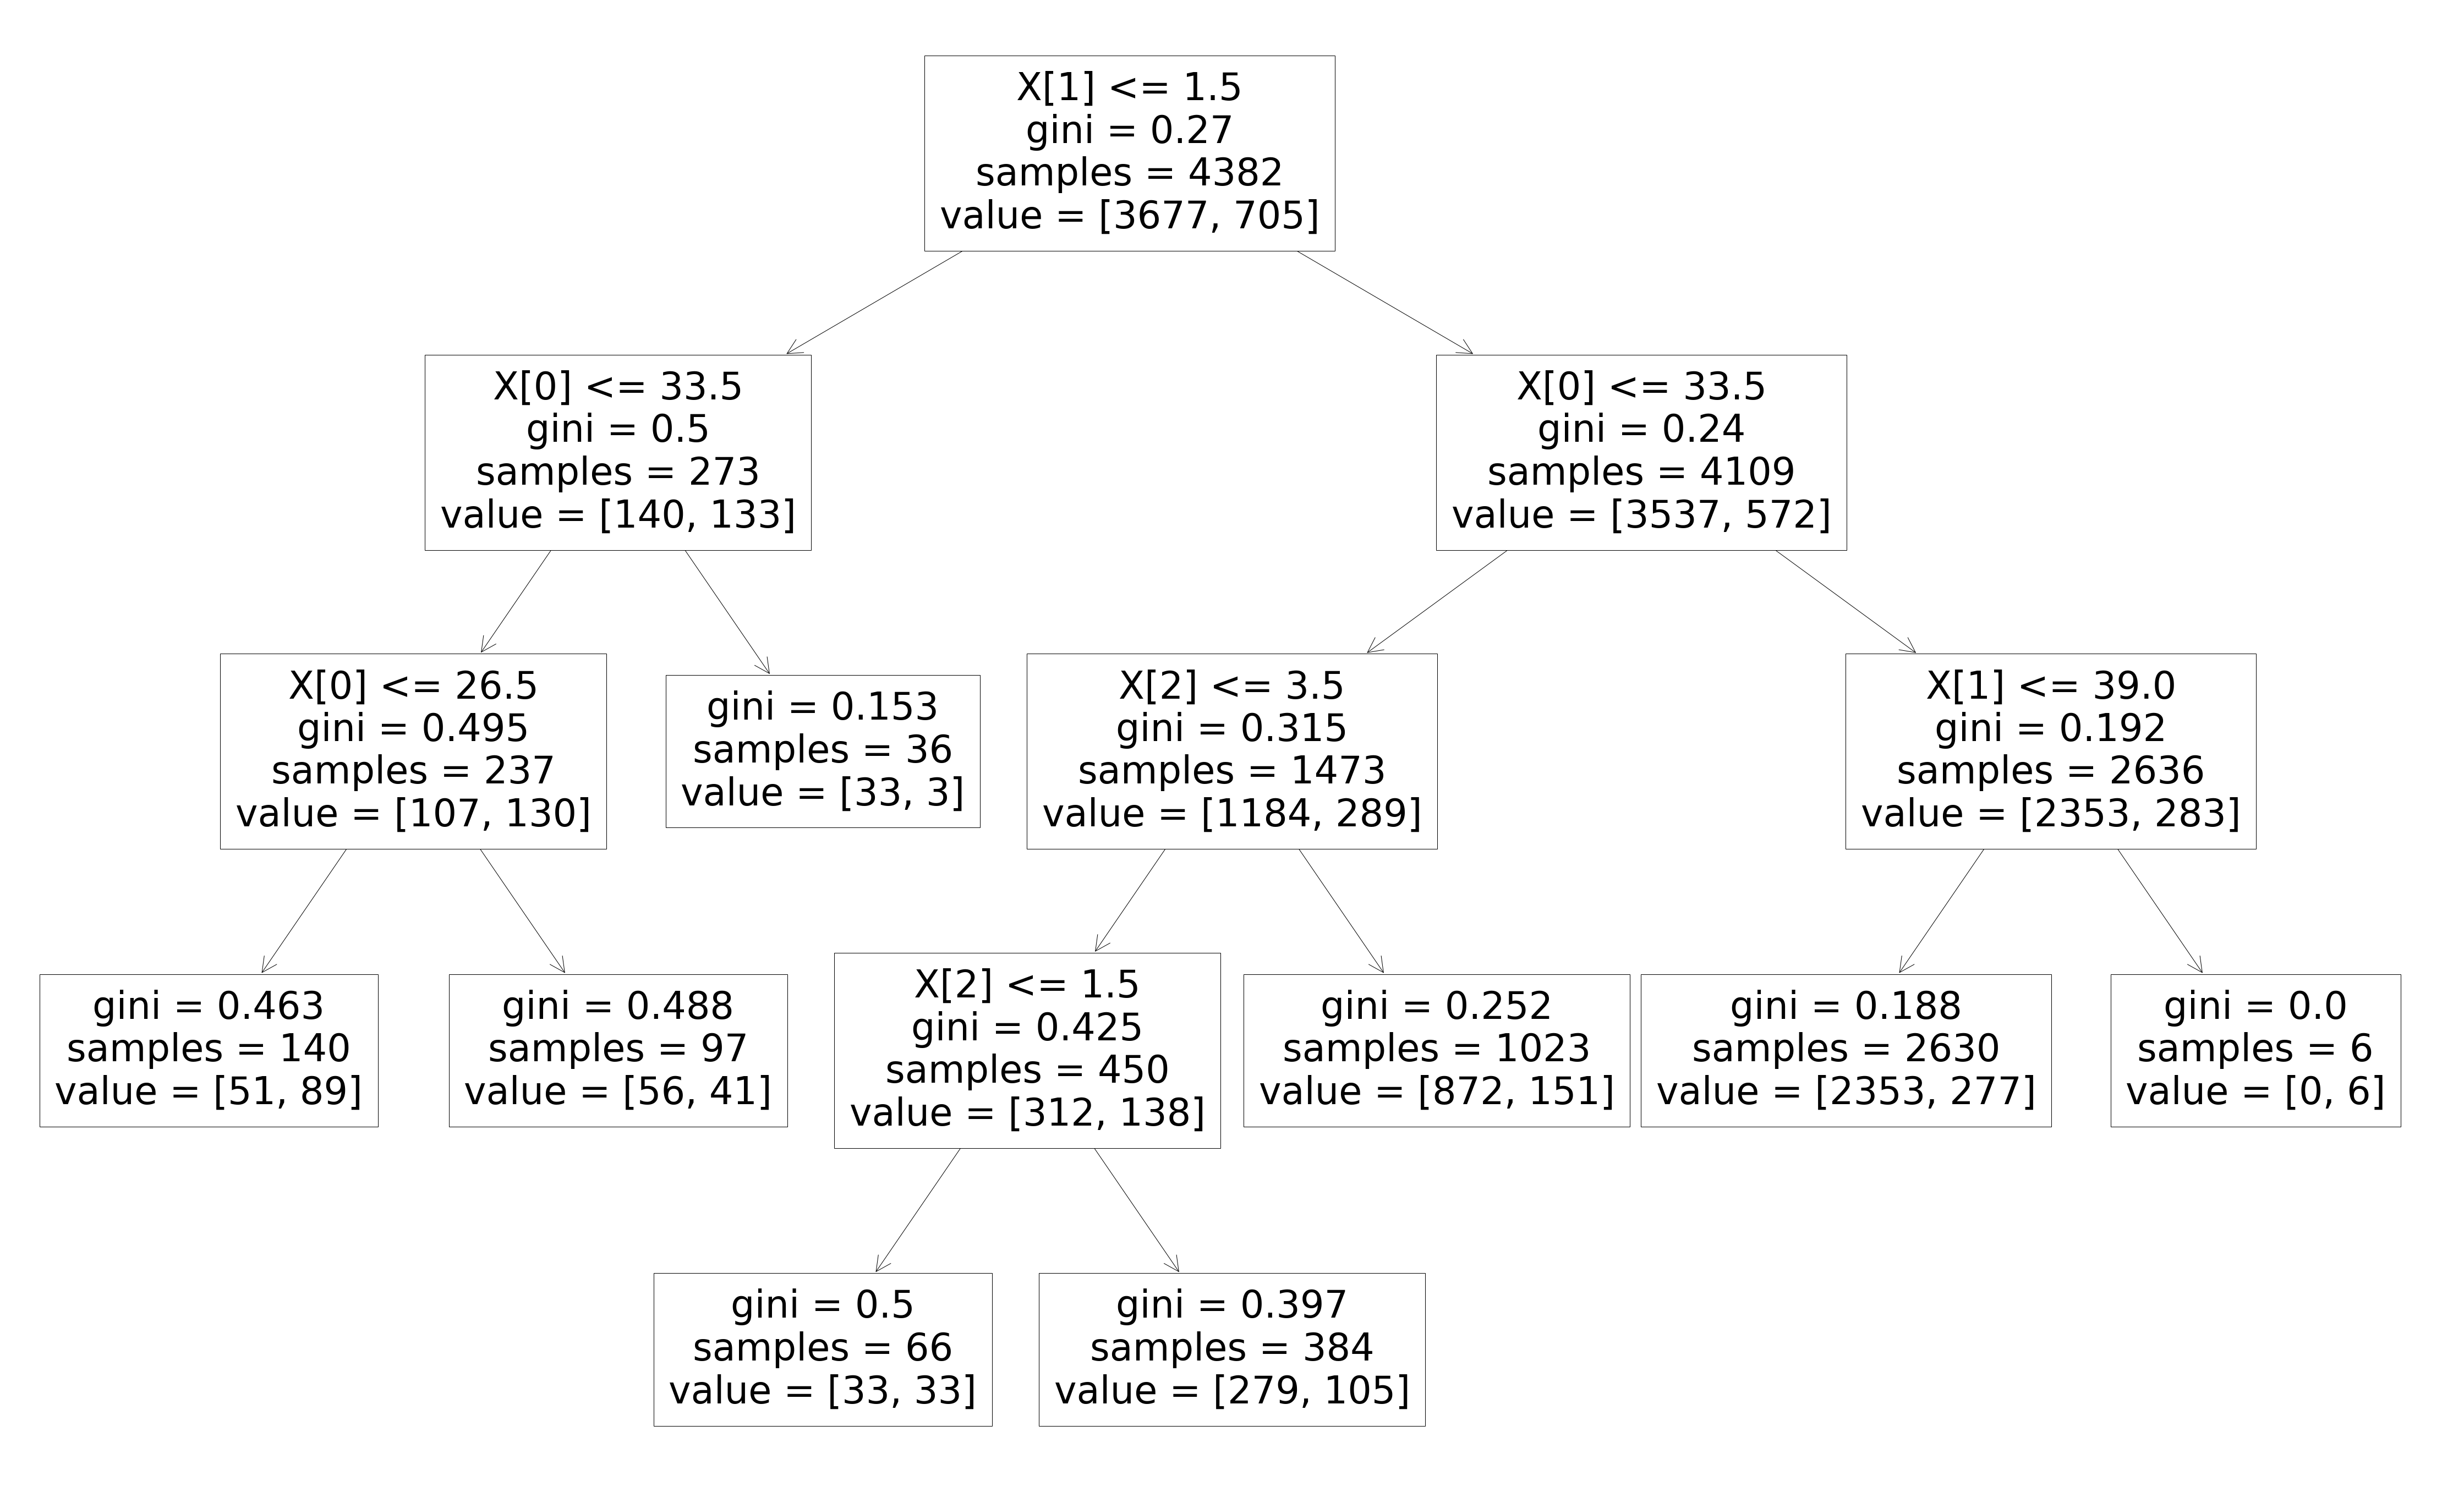

In [102]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80, 50
print(plot_tree(tree_model))

In [45]:
with open("Attritiontree.dot",'w') as f:
    f = tree.export_graphviz(tree_model,
                             feature_names=['Age',
                                            'TotalWorkingYears'
                            ,'YearsAtCompany'],out_file=f)
    

In [46]:
y.value_counts(ascending=True)

Yes     705
No     3677
Name: Attrition, dtype: int64

# Prediction -->>

In [47]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                  test_size=0.20)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train)

[[ 1.53977944  0.59311702 -2.38992207 ... -0.0027665  -0.3771676
  -1.16134109]
 [ 0.44825632  0.59311702 -0.49174014 ... -0.4958133  -0.68488931
  -0.60266685]
 [-0.31580987 -2.40886877  1.40644179 ... -0.33146437 -0.68488931
  -1.16134109]
 ...
 [ 0.88486557  0.59311702 -0.49174014 ... -0.9888601  -0.68488931
  -1.16134109]
 [-0.42496219  0.59311702 -0.49174014 ...  0.4902803   1.46916263
   1.07335588]
 [-0.64326681 -0.90787587 -0.49174014 ... -0.4958133  -0.68488931
  -0.32332973]]


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance =pca.explained_variance_ratio_
explained_variance

array([0.15367381, 0.08037876])

In [136]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=4, random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm  = confusion_matrix(y_test,y_pred)
ac  = accuracy_score(y_test,y_pred)
clr = classification_report(y_test,y_pred)

In [137]:
cm

array([[725,  18],
       [117,  17]])

In [138]:
print("The accuracy of the prediction is::",ac*100,'%')

The accuracy of the prediction is:: 84.60661345496008 %


In [139]:
print(clr)

              precision    recall  f1-score   support

          No       0.86      0.98      0.91       743
         Yes       0.49      0.13      0.20       134

    accuracy                           0.85       877
   macro avg       0.67      0.55      0.56       877
weighted avg       0.80      0.85      0.81       877



# Inference from the above Analysis:--
   1. Although the accuracy of our model is quite good, false negative i.e. the type-II error is quite high.
   2. In the Classification report above f-1 score and the precision for the employees who have been removed         from the company is quite low as it is around 16.
   3. Thus, the prediction being quite another method can be utilized to reduce these errors.

# Analysis using KNN:--

In [120]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [121]:
xtrain.shape

(3505, 19)

In [122]:
xtrain.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
132,43,2,2,10,2,1,0,1,7,0,46170,1.0,11,0,25.0,2,25,3,9
908,48,1,2,10,4,2,0,3,3,1,22700,2.0,14,3,23.0,2,2,2,2
2056,30,2,1,7,2,1,0,1,4,1,34480,1.0,11,0,10.0,3,10,1,4
3292,27,2,2,2,4,3,1,2,3,0,33460,1.0,21,1,9.0,2,9,0,8
615,36,2,1,9,2,3,1,2,7,0,119350,1.0,11,3,7.0,6,7,1,7


In [123]:
xtest.shape

(877, 19)

In [124]:
xtest.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1487,37,0,1,1,3,3,1,2,7,0,41270,2.0,13,1,15.0,2,5,0,2
3376,33,2,1,1,4,3,0,4,4,2,44650,0.0,13,0,6.0,3,5,1,4
3076,31,2,1,10,4,1,1,3,7,1,21870,1.0,15,1,13.0,2,13,3,12
4133,38,2,1,23,3,3,1,3,8,1,39040,1.0,22,0,10.0,3,10,1,9
2940,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0


In [125]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain).score(xtest,ytest)
ypred = knn.predict(xtest)
acc = accuracy_score(ytest,ypred)
print("The accuracy score of the prediction",acc*100,'%')

The accuracy score of the prediction 95.43899657924743 %


In [126]:
rep = classification_report(ytest,ypred)
print(rep)

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       717
         Yes       0.98      0.77      0.86       160

    accuracy                           0.95       877
   macro avg       0.96      0.88      0.92       877
weighted avg       0.96      0.95      0.95       877



In [127]:
cf = confusion_matrix(ytest,ypred)
cf

array([[714,   3],
       [ 37, 123]])

# Inference from the above analysis:--
  1. The accuracy rate achieved from the k-nearest neighbours is better than decision randomforest classifier.
  2. The False positive(Type-I) and False negative(Type-II) in the above matrix are minimized as well, thus        prediction is quite good.
  3. Now, we gonna use a further powerful algorithm for prediction accuracy...i.e. SVM

# Analysis using Support Vector Machine(SVM)-->>

In [132]:
from sklearn import svm

In [133]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state =0)
clf = svm.SVC(gamma=0.01,C=100)
clf.fit(X_train,Y_train)
Ypred = clf.predict(X_test)
accuracy_score(Y_test,Ypred)

0.9931584948688712

In [134]:
confusion_matrix(Y_test,Ypred)

array([[717,   0],
       [  6, 154]])

In [135]:
print(classification_report(Y_test,Ypred))

              precision    recall  f1-score   support

          No       0.99      1.00      1.00       717
         Yes       1.00      0.96      0.98       160

    accuracy                           0.99       877
   macro avg       1.00      0.98      0.99       877
weighted avg       0.99      0.99      0.99       877



# Inference from the above analysis:--
  1. The accuracy rate achieved from the SVM is the  best among all the algorithms.
  2. The False positive(Type-I) and False negative(Type-II) in the confusion matrix are minimized , thus            prediction is quite good.
  3. Thus SVM can be concluded as the best prrediction model for this problem.